# Работа с датами в Python

Модуль datetime предоставляет классы для обработки времени и даты разными способами.

In [161]:
import datetime

## Классы, предоставляемые модулем datetime:

* Класс **`datetime.date(year, month, day)`** - стандартная дата. Атрибуты: year, month, day. Неизменяемый объект.
* Класс **`datetime.time(hour=0, minute=0, second=0, microsecond=0, tzinfo=None)`** - стандартное время, не зависит от даты.
* Класс **`datetime.timedelta`** - разница между двумя моментами времени, с точностью до микросекунд.
* Класс **`datetime.tzinfo`** - абстрактный базовый класс для информации о временной зоне (например, для учета часового пояса и / или летнего времени).
* Класс **`datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)`** - комбинация даты и времени.

##  Методы класса datetime
* **`datetime.today()`** - объект datetime из текущей даты и времени. Работает также, как и datetime.now() со значением tz=None.
* **`datetime.combine(date, time)`** - объект datetime из комбинации объектов date и time.
* **`datetime.strptime(date_string, format)`** - преобразует строку в datetime (так же, как и функция strptime из модуля time).
* **`datetime.strftime(format)`** - см. функцию strftime из модуля time.
* **`datetime.date()`** - объект даты (с отсечением времени).
* **`datetime.time()`** - объект времени (с отсечением даты).
* **`datetime.replace([year[, month[, day[, hour[, minute[, second[, microsecond[, tzinfo]]]]]]]])`** - возвращает новый объект datetime с изменёнными атрибутами.
* **`datetime.weekday()`** - день недели в виде числа, понедельник - 0, воскресенье - 6.


In [3]:
datetime.datetime(2017, 10, 5).year

2017

In [73]:
today = datetime.datetime.today()
today

datetime.datetime(2017, 10, 6, 15, 13, 21, 597849)

In [74]:
print('ctime:', today.ctime())
print('tuple:', today.timetuple())
print('ordinal:', today.toordinal()) # Return proleptic Gregorian ordinal.  January 1 of year 1 is day 1.
print('Year:', today.year)
print('Mon :', today.month)
print('Day :', today.day)

ctime: Fri Oct  6 15:13:21 2017
tuple: time.struct_time(tm_year=2017, tm_mon=10, tm_mday=6, tm_hour=15, tm_min=13, tm_sec=21, tm_wday=4, tm_yday=279, tm_isdst=-1)
ordinal: 736608
Year: 2017
Mon : 10
Day : 6


Ещё есть тип timedelta

In [165]:
today.replace(today.year + 1)

datetime.datetime(2018, 10, 6, 15, 13, 21, 597849)

In [168]:
a = datetime.datetime(2010, 12, 5)
b = datetime.datetime(2010, 12, 7)
d = b - a
d.days

2

In [174]:
today + datetime.timedelta(days=1000)

datetime.datetime(2020, 7, 2, 15, 13, 21, 597849)

В пандас (и numpy) также существует специальные типы данных для работы с временными данными: datetime64 и timedelta64.

In [75]:
import pandas as pd
import numpy as np
from datetime import datetime, time
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams

In [76]:
pd.date_range('1/1/2000', periods=10, freq="D")

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

Обозначения, используемые для задания частоты

| Alias | Description |
| ---- | :---- |
| B | business day frequency |
| C | custom business day frequency (experimental) |
| D | calendar day frequency |
| W | weekly frequency |
| M | month end frequency |
| SM | semi-month end frequency (15th and end of month) |
| BM | business month end frequency |
| CBM | custom business month end frequency |
| MS | month start frequency |
| SMS | semi-month start frequency (1st and 15th) |
| BMS | business month start frequency |
| CBMS | custom business month start frequency |
| Q | quarter end frequency |
| BQ | business quarter endfrequency |
| QS | quarter start frequency |
| BQS | business quarter start frequency |
| A | year end frequency |
| BA | business year end frequency |
| AS | year start frequency |
| BAS | business year start frequency |
| BH | business hour frequency |
| H | hourly frequency |
| T, min | minutely frequency |
| S | secondly frequency |
| L, ms | milliseconds |
| U, us | microseconds |
| N | nanoseconds |

Можно использовать вместе с числами для уточнения

In [90]:
pd.date_range('1/1/2000', periods=10, freq="3D")

DatetimeIndex(['2000-01-01', '2000-01-04', '2000-01-07', '2000-01-10',
               '2000-01-13', '2000-01-16', '2000-01-19', '2000-01-22',
               '2000-01-25', '2000-01-28'],
              dtype='datetime64[ns]', freq='3D')

Временной ряд можно задавать и иным образом — указывая время начала и время окончания.

In [96]:
start = datetime(2011, 1, 1)
end = datetime(2012, 1, 1)
pd.date_range(start, end, freq="BM")

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29',
               '2011-05-31', '2011-06-30', '2011-07-29', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30'],
              dtype='datetime64[ns]', freq='BM')

Можно указывать только один конец:

In [97]:
pd.date_range(end=end, periods=20)

DatetimeIndex(['2011-12-13', '2011-12-14', '2011-12-15', '2011-12-16',
               '2011-12-17', '2011-12-18', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-24',
               '2011-12-25', '2011-12-26', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30', '2011-12-31', '2012-01-01'],
              dtype='datetime64[ns]', freq='D')

Или даже превращать числа в дату (в данном случае в день)

In [98]:
pd.to_datetime(
    [1, 2, 3, 0], unit='D', origin=datetime(2012, 5, 3))  # можно просто "2012, 5, 3"

DatetimeIndex(['2012-05-04', '2012-05-05', '2012-05-06', '2012-05-03'], dtype='datetime64[ns]', freq=None)

Пандас понимает разные форматы задания дат

In [86]:
s = pd.Series(
    ['2000-01-01', 'Jul 31, 2009', '2010-01-10', '2000-01-04', '2000-01-05'])
s

0      2000-01-01
1    Jul 31, 2009
2      2010-01-10
3      2000-01-04
4      2000-01-05
dtype: object

In [110]:
pd.to_datetime(s)

0   2000-01-01
1   2009-07-31
2   2010-01-10
3   2000-01-04
4   2000-01-05
dtype: datetime64[ns]

Работа с датафреймами.

In [99]:
ts_df = pd.DataFrame(
    np.random.randn(10, 3),
    columns=['A', 'B', 'C'],
    index=pd.date_range('1/1/2000', periods=10))
ts_df.head()

A         B         C
2000-01-01  0.180772  1.202387 -1.937531
2000-01-02  0.955101  0.930135 -1.251356
2000-01-03 -1.162816  0.843237 -3.061066
2000-01-04  0.616560 -1.417411 -0.964808
2000-01-05 -1.478241  0.728027  0.666432

Это особенный датафрейм, проиндексированный, как DatetimeIndex

In [100]:
ts_df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')

К датафреймам, проиндексированным таким образом, можно обращаться через индекс

In [103]:
ts_df["2000-01":"2000-01-04":2]

A         B         C
2000-01-01  0.180772  1.202387 -1.937531
2000-01-03 -1.162816  0.843237 -3.061066

Можно изменять промежуток при помощи метода `asfreq`:

In [112]:
ts_df.asfreq("45Min").head()

A         B         C
2000-01-01 00:00:00  0.180772  1.202387 -1.937531
2000-01-01 00:45:00       NaN       NaN       NaN
2000-01-01 01:30:00       NaN       NaN       NaN
2000-01-01 02:15:00       NaN       NaN       NaN
2000-01-01 03:00:00       NaN       NaN       NaN

In [111]:
ts_df.asfreq("45Min", method="pad").head()

A         B         C
2000-01-01 00:00:00  0.180772  1.202387 -1.937531
2000-01-01 00:45:00  0.180772  1.202387 -1.937531
2000-01-01 01:30:00  0.180772  1.202387 -1.937531
2000-01-01 02:15:00  0.180772  1.202387 -1.937531
2000-01-01 03:00:00  0.180772  1.202387 -1.937531

Можно аггрегировать наблюдения по дням

In [109]:
ts_df.resample("3D").mean()

A         B         C
2000-01-01 -0.008981  0.991920 -2.083318
2000-01-04 -0.083320 -0.433786  0.736896
2000-01-07 -0.236956 -0.115868  0.686600
2000-01-10  0.440161  0.302742 -1.019689

А что если колонка с датами — не индекс?

In [114]:
ts_df.reset_index(inplace=True)

In [121]:
ts_df.rename(columns={"index": "date"}, inplace=True)

In [122]:
ts_df.head()

date         A         B         C
0 2000-01-01  0.180772  1.202387 -1.937531
1 2000-01-02  0.955101  0.930135 -1.251356
2 2000-01-03 -1.162816  0.843237 -3.061066
3 2000-01-04  0.616560 -1.417411 -0.964808
4 2000-01-05 -1.478241  0.728027  0.666432

Это можно сделать так:

In [128]:
ts_df[(ts_df["date"] > datetime(2000, 1, 4))]

date         A         B         C
4 2000-01-05 -1.478241  0.728027  0.666432
5 2000-01-06  0.611721 -0.611974  2.509063
6 2000-01-07 -0.833818  0.976332  1.765312
7 2000-01-08  0.095417 -0.027399 -0.324176
8 2000-01-09  0.027533 -1.296538  0.618665
9 2000-01-10  0.440161  0.302742 -1.019689

Или с использованием свойства dt колонки датами

In [129]:
ts_df[(ts_df["date"].dt.day > 3) & (ts_df["date"].dt.day < 6)]

date         A         B         C
3 2000-01-04  0.616560 -1.417411 -0.964808
4 2000-01-05 -1.478241  0.728027  0.666432

| Property | Description |
| :----------|:------------|
| year | The year of the datetime |
| month | The month of the datetime |
| day | The days of the datetime |
| hour | The hour of the datetime |
| minute | The minutes of the datetime |
| second | The seconds of the datetime |
| microsecond | The microseconds of the datetime |
| nanosecond | The nanoseconds of the datetime |
| date | Returns datetime.date (does not contain timezone information) |
| time | Returns datetime.time (does not contain timezone information) |
| dayofyear | The ordinal day of year |
| weekofyear | The week ordinal of the year |
| week | The week ordinal of the year |
| dayofweek | The number of the day of the week with Monday=0, Sunday=6 |
| weekday | The number of the day of the week with Monday=0, Sunday=6 |
| weekday_name | The name of the day in a week (ex: Friday) |
| quarter | Quarter of the date: Jan-Mar = 1, Apr-Jun = 2, etc. |
| days_in_month | The number of days in the month of the datetime |
| is_month_start | Logical indicating if first day of month (defined by frequency) |
| is_month_end | Logical indicating if last day of month (defined by frequency) |
| is_quarter_start | Logical indicating if first day of quarter (defined by frequency) |
| is_quarter_end | Logical indicating if last day of quarter (defined by frequency) |
| is_year_start | Logical indicating if first day of year (defined by frequency) |
| is_year_end | Logical indicating if last day of year (defined by frequency) |
| is_leap_year | Logical indicating if the date belongs to a leap year |

## Самостоятельная работа.
Да, опять про преступления.

1. Создайте новую колонку, где будет храниться время и дата совершения преступления в подходящем формате.

    *В наборе данных время закодировано в формате military time. Для выполнения первого пункта задания Вам необходимо перекодировать время по следующей схеме:*
<img src="http://military.onlineclock.net/chart/chart.jpg" width="400">
3. В какое время суток уровень преступности наивысший. С чем это может быть связано?
2. В какой день недели происходит наибольшее количество преступлений. С чем это может быть связано?
4. Постройте график, показывающий распределение количества преступлений в каждый из дней недели. Видите ли Вы различия во времени совершения преступлений в каждый из дней?
4. Постройте графики распределения количества преступлений по времени суток для мужчин и женщин. Различаются ли эти два распределения? Если да, то каким образом?
5. Какие виды преступлений чаще совершаются днём, а какие ночью? Почему?
6. Рассчитайте среднее количество преступлений в каждый из дней. Визуализируйте эту величину и опишите график.
7. Сколько дней в среднем проходит с момента совершения преступления до момента поступления информации о его совершении?

<img src="http://military.onlineclock.net/chart/chart.jpg" width="400">

In [195]:
crimes = pd.read_csv("la_crimes.csv", parse_dates=["Date Reported", "Date Occurred"])

In [160]:
(crimes["Date Reported"].values[100] - crimes["Date Occurred"].values[100])

numpy.timedelta64(0,'ns')

In [191]:
t1 = crimes["Date Reported"]
t2 = crimes["Date Occurred"]
print(t1.dtype, t2.dtype)
(t2 - t1).astype('timedelta64[m]')

datetime64[ns] datetime64[ns]


0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
5        -1440.0
6            0.0
7        -1440.0
8            0.0
9            0.0
10           0.0
11       -1440.0
12       -2880.0
13           0.0
14       -7200.0
15           0.0
16           0.0
17           0.0
18           0.0
19           0.0
20      -57600.0
21           0.0
22           0.0
23      -24480.0
24      -12960.0
25       -1440.0
26           0.0
27       -1440.0
28           0.0
29           0.0
          ...   
4970     -1440.0
4971    -27360.0
4972         0.0
4973   -531360.0
4974     -7200.0
4975         0.0
4976     -1440.0
4977     -2880.0
4978     -1440.0
4979     -4320.0
4980     -1440.0
4981     -1440.0
4982     -1440.0
4983         0.0
4984     -1440.0
4985     -4320.0
4986     -1440.0
4987     -4320.0
4988         0.0
4989    -41760.0
4990         0.0
4991     -1440.0
4992         0.0
4993    -48960.0
4994         0.0
4995         0.0
4996     -1440.0
4997         0

In [184]:
#pd.Timedelta(crimes["Date Reported"] - crimes["Date Occurred"])
(crimes["Date Reported"] - crimes["Date Occurred"]).seca

AttributeError: 'Series' object has no attribute 'seconds'

In [196]:
from datetime import time


def parse_military_time(mtime):
    minutes = int(str(mtime)[-2:])
    hours = str(mtime)[:-2]
    hours = int(hours) if hours else 0
    return time(hours, minutes)

In [197]:
crimes["Time Occurred"] = crimes["Time Occurred"].apply(parse_military_time)

In [198]:
from datetime import timedelta
from datetime import datetime

# def merge_date_time(row):
#     date = row["Date Occurred"]
#     hour = row["Time Occurred"].hour
#     minute = row["Time Occurred"].minute
#     return date + timedelta(hours=hour, minutes=minute)


def merge_date_time(row):
    return datetime.combine(row["Date Occurred"], row["Time Occurred"])

In [199]:
crimes["DateTime Occurred"] = crimes.apply(merge_date_time, axis=1)

(0, 23)

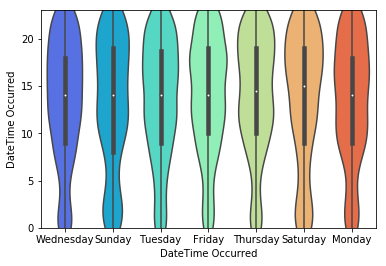

In [94]:
sns.violinplot(
    x=crimes["DateTime Occurred"].dt.weekday_name,
    y=crimes["DateTime Occurred"].dt.hour,
    palette='rainbow')

plt.ylim(0, 23)

(0, 23)

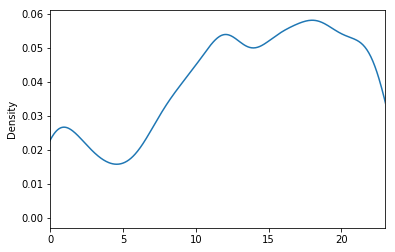

In [15]:
crimes["DateTime Occurred"].dt.hour.plot(kind="kde")
plt.xlim(0, 23)

(0, 23)

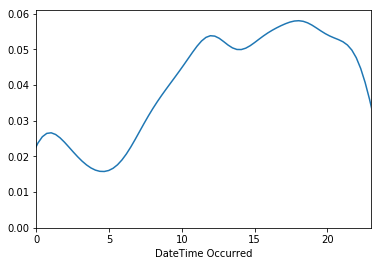

In [98]:
sns.distplot(crimes["DateTime Occurred"].dt.hour, hist=False)
plt.xlim(0, 23)

(0, 23)

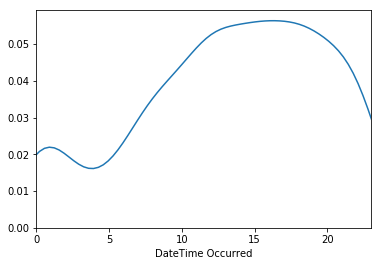

In [101]:
sns.distplot(crimes[crimes["DateTime Occurred"].dt.weekday_name == "Wednesday"]["DateTime Occurred"].dt.hour, hist=False)

plt.xlim(0, 23)

(0, 23)

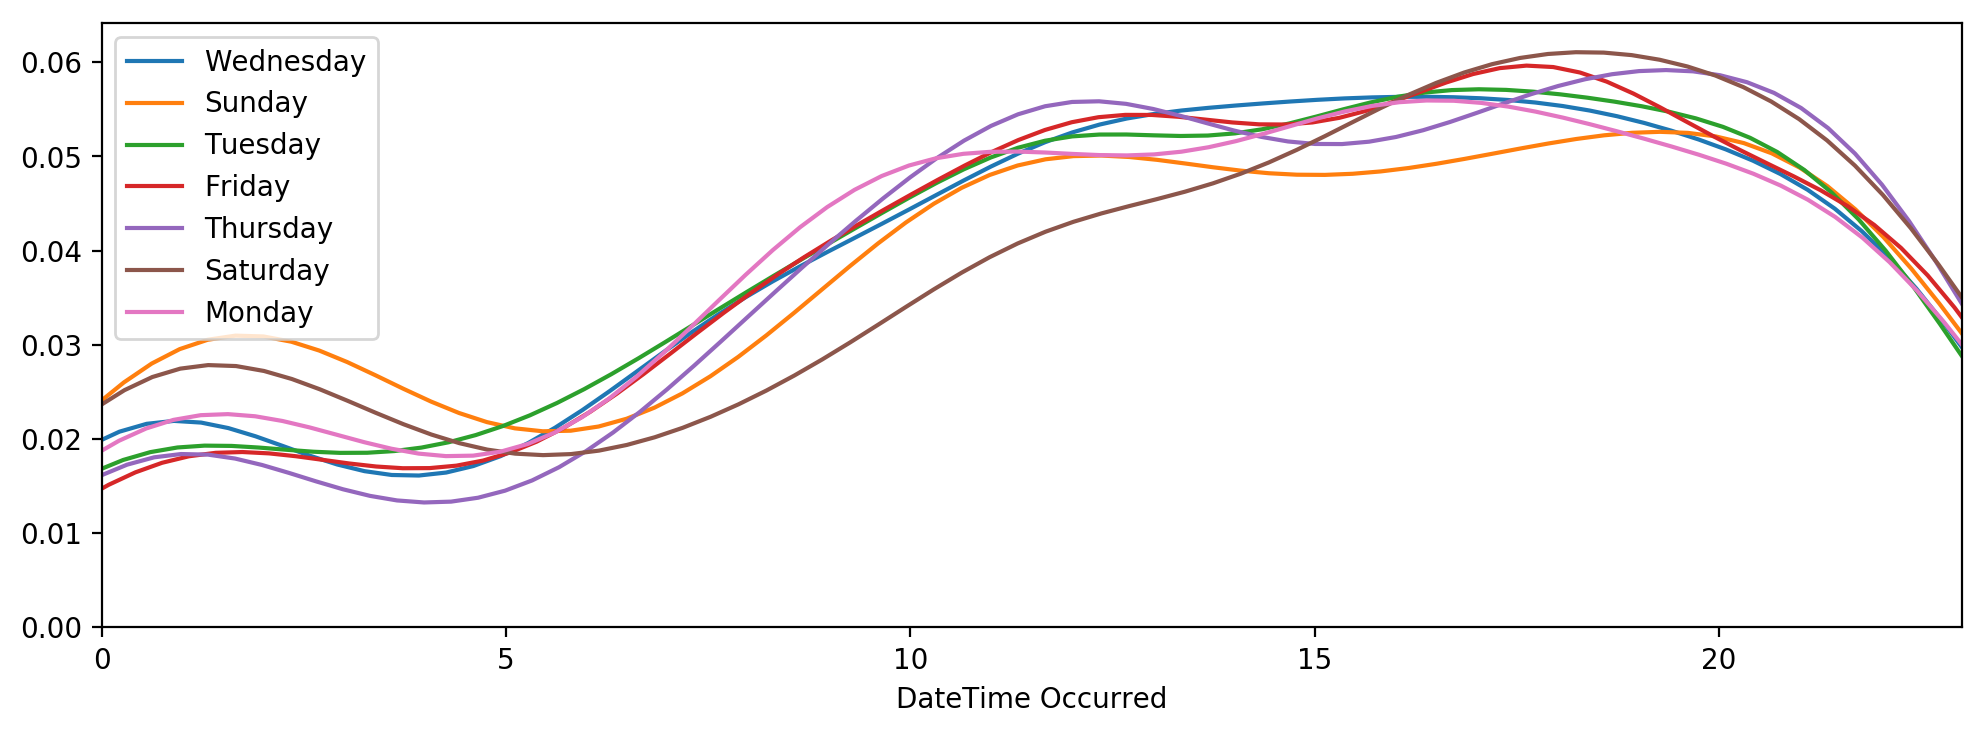

In [107]:
plt.subplots(figsize=(12, 4), dpi=200)

for wday in crimes["DateTime Occurred"].dt.weekday_name.unique():
    ax = sns.distplot(
        crimes[crimes["DateTime Occurred"].dt.weekday_name == wday][
            "DateTime Occurred"].dt.hour,
        hist=False,
        label=wday)
    ax.legend()
plt.xlim(0, 23)

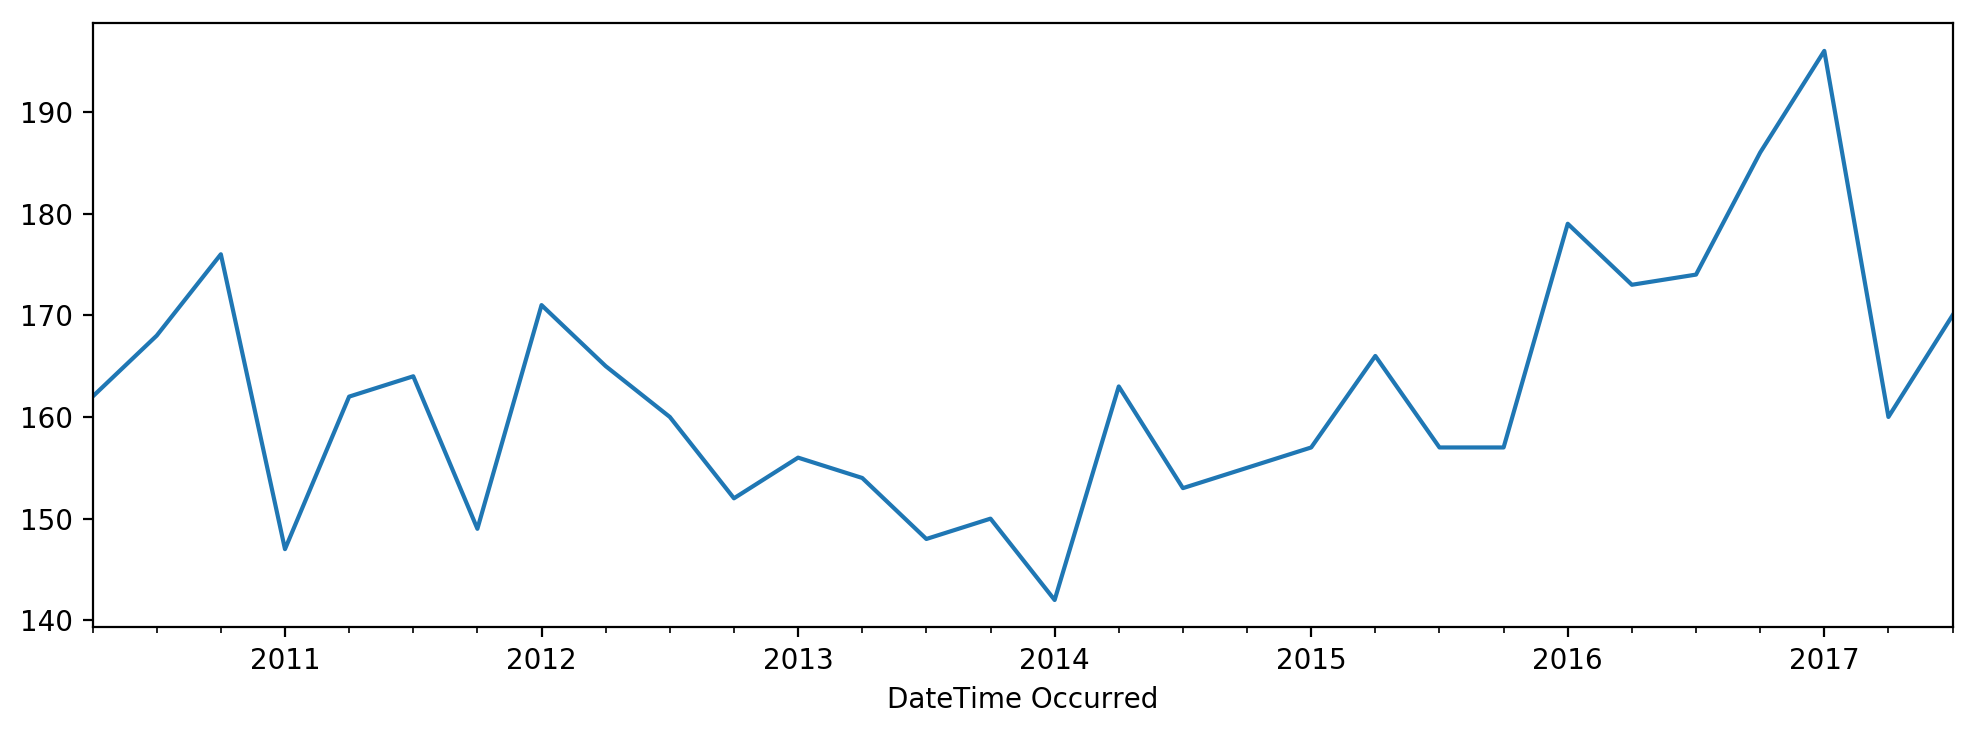

In [139]:
plt.subplots(figsize=(12, 4), dpi=200)
crimes.resample("3M", on="DateTime Occurred").size()[1:-1].plot()

In [71]:
mask = (crimes["DateTime Occurred"] >= "2013-1") & (crimes["DateTime Occurred"] < "2013-1-3")
# опасно "2013-1-3" означает 2013 год, 3 января, 0:00:00 времени, а вовсе не весь этот день
crimes[mask]

DR Number Date Reported Date Occurred Time Occurred  Area ID  \
1052  141904093    2014-01-02    2013-01-02      15:15:00       19   
1277  131504015    2013-01-01    2013-01-01      02:10:00       15   
1672  131317446    2013-09-01    2013-01-01      08:00:00       13   
2068  130704044    2013-01-02    2013-01-01      16:20:00        7   
2145  132104178    2013-01-04    2013-01-02      20:00:00       21   
2884  131505259    2013-01-24    2013-01-01      08:00:00       15   

        Area Name  Reporting District  Crime Code  \
1052      Mission                1954         510   
1277  N Hollywood                1583         624   
1672       Newton                1362         810   
2068     Wilshire                 764         901   
2145      Topanga                2158         341   
2884  N Hollywood                1521         956   

                                 Crime Code Description        MO Codes  \
1052                                   VEHICLE - STOLEN             NaN   
1277                           BATTERY - SIMPLE ASSAULT            0400   
1672                                      SEX, UNLAWFUL  1813 0533 1259   
2068                     VIOLATION OF RESTRAINING ORDER            1501   
2145  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...            0344   
2884                                      LETTERS, LEWD            1501   

             ...          Status Code Status Description Crime Code 1  \
1052         ...                   IC        Invest Cont        510.0   
1277         ...                   IC        Invest Cont        624.0   
1672         ...                   IC        Invest Cont        810.0   
2068         ...                   AO        Adult Other        901.0   
2145         ...                   IC        Invest Cont        341.0   
2884         ...                   AO        Adult Other        956.0   

      Crime Code 2 Crime Code 3  Crime Code 4  \
1052           NaN          NaN           NaN   
1277           NaN          NaN           NaN   
1672           NaN          NaN           NaN   
2068           NaN          NaN           NaN   
2145           NaN          NaN           NaN   
2884           NaN          NaN           NaN   

                                       Address Cross Street  \
1052  10400 N  SEPULVEDA                    BL          NaN   
1277                                   VENTURA      RADFORD   
1672    400 E  48TH                         ST          NaN   
2068   1500    HAUSER                       BL          NaN   
2145   6300    DE SOTO                      AV          NaN   
2884  13100    VANOWEN                      ST          NaN   

                 Location    DateTime Occurred  
1052  (34.2591, -118.4674) 2013-01-02 15:15:00  
1277  (34.1436, -118.3929) 2013-01-01 02:10:00  
1672  (33.9998, -118.2696) 2013-01-01 08:00:00  
2068  (34.0472, -118.3574) 2013-01-01 16:20:00  
2145  (34.1847, -118.5888) 2013-01-02 20:00:00  
2884   (34.194, -118.4181) 2013-01-01 08:00:00  

[6 rows x 27 columns]

In [54]:
dt_index = crimes.set_index("DateTime Occurred")

In [66]:
dt_index['2013-1':'2013-1-2']

DR Number Date Reported Date Occurred Time Occurred  \
DateTime Occurred                                                          
2013-01-02 15:15:00  141904093    2014-01-02    2013-01-02      15:15:00   
2013-01-01 02:10:00  131504015    2013-01-01    2013-01-01      02:10:00   
2013-01-01 08:00:00  131317446    2013-09-01    2013-01-01      08:00:00   
2013-01-01 16:20:00  130704044    2013-01-02    2013-01-01      16:20:00   
2013-01-02 20:00:00  132104178    2013-01-04    2013-01-02      20:00:00   
2013-01-01 08:00:00  131505259    2013-01-24    2013-01-01      08:00:00   

                     Area ID    Area Name  Reporting District  Crime Code  \
DateTime Occurred                                                           
2013-01-02 15:15:00       19      Mission                1954         510   
2013-01-01 02:10:00       15  N Hollywood                1583         624   
2013-01-01 08:00:00       13       Newton                1362         810   
2013-01-01 16:20:00        7     Wilshire                 764         901   
2013-01-02 20:00:00       21      Topanga                2158         341   
2013-01-01 08:00:00       15  N Hollywood                1521         956   

                                                Crime Code Description  \
DateTime Occurred                                                        
2013-01-02 15:15:00                                   VEHICLE - STOLEN   
2013-01-01 02:10:00                           BATTERY - SIMPLE ASSAULT   
2013-01-01 08:00:00                                      SEX, UNLAWFUL   
2013-01-01 16:20:00                     VIOLATION OF RESTRAINING ORDER   
2013-01-02 20:00:00  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...   
2013-01-01 08:00:00                                      LETTERS, LEWD   

                           MO Codes          ...           \
DateTime Occurred                            ...            
2013-01-02 15:15:00             NaN          ...            
2013-01-01 02:10:00            0400          ...            
2013-01-01 08:00:00  1813 0533 1259          ...            
2013-01-01 16:20:00            1501          ...            
2013-01-02 20:00:00            0344          ...            
2013-01-01 08:00:00            1501          ...            

                                                 Weapon Description  \
DateTime Occurred                                                     
2013-01-02 15:15:00                                             NaN   
2013-01-01 02:10:00  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   
2013-01-01 08:00:00                                             NaN   
2013-01-01 16:20:00                                             NaN   
2013-01-02 20:00:00                                             NaN   
2013-01-01 08:00:00                                             NaN   

                    Status Code Status Description  Crime Code 1 Crime Code 2  \
DateTime Occurred                                                               
2013-01-02 15:15:00          IC        Invest Cont         510.0          NaN   
2013-01-01 02:10:00          IC        Invest Cont         624.0          NaN   
2013-01-01 08:00:00          IC        Invest Cont         810.0          NaN   
2013-01-01 16:20:00          AO        Adult Other         901.0          NaN   
2013-01-02 20:00:00          IC        Invest Cont         341.0          NaN   
2013-01-01 08:00:00          AO        Adult Other         956.0          NaN   

                     Crime Code 3 Crime Code 4  \
DateTime Occurred                                
2013-01-02 15:15:00           NaN          NaN   
2013-01-01 02:10:00           NaN          NaN   
2013-01-01 08:00:00           NaN          NaN   
2013-01-01 16:20:00           NaN          NaN   
2013-01-02 20:00:00           NaN          NaN   
2013-01-01 08:00:00           NaN          NaN   

                                                      Address Cross Street  \
DateTime Occurre

/usr/local/lib/python3.6/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0, 23)

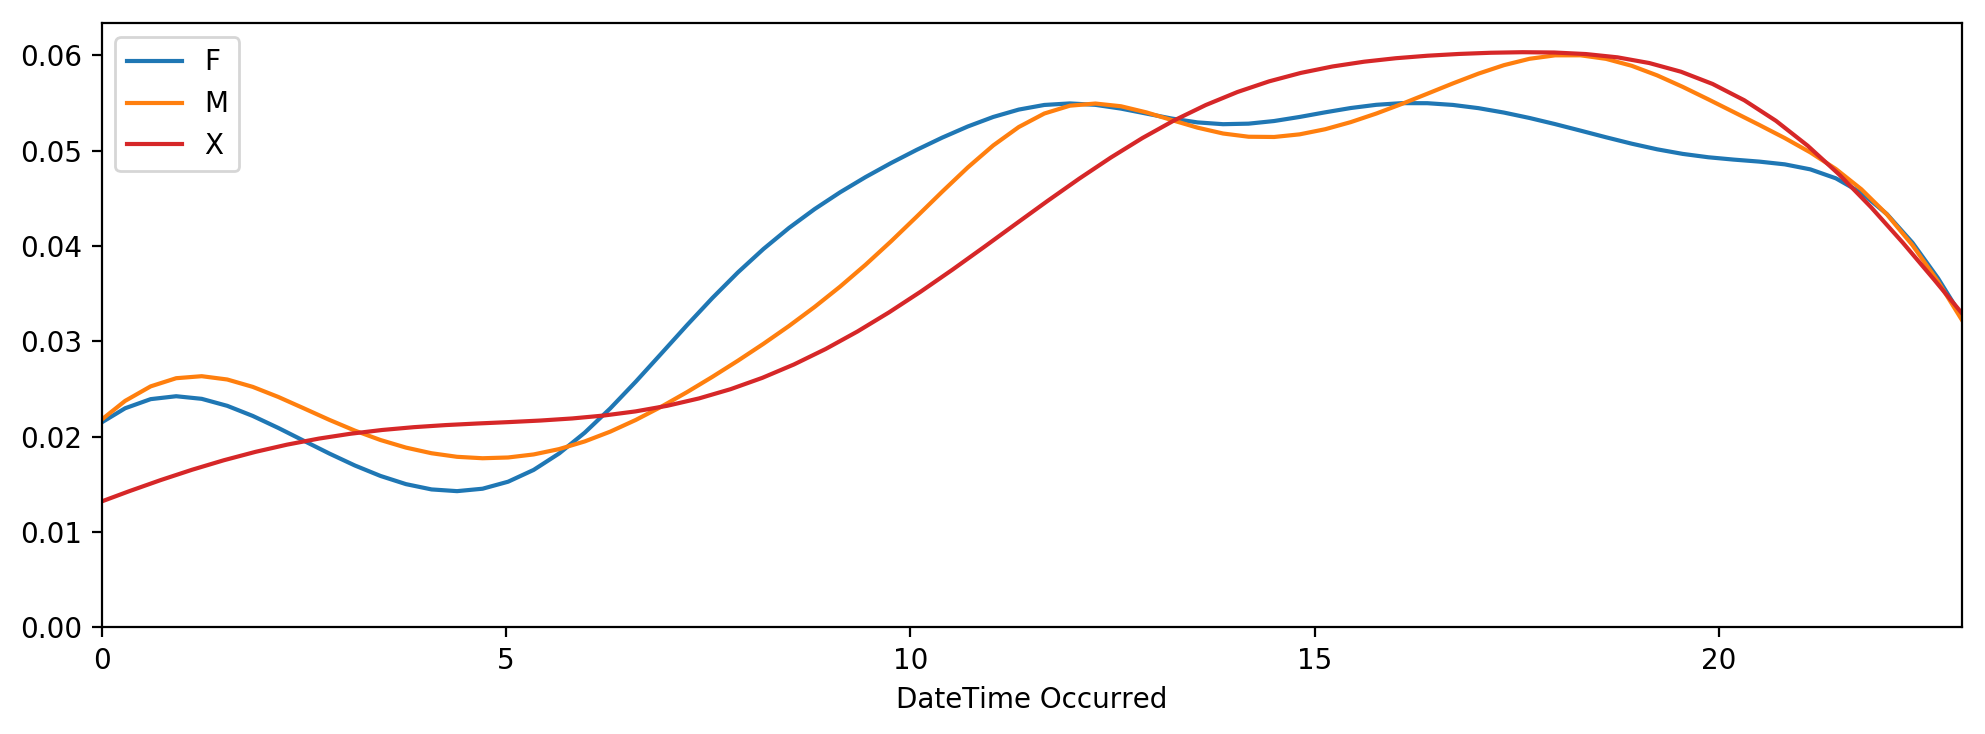

In [200]:
plt.subplots(figsize=(12, 4), dpi=200)

for sex in crimes["Victim Sex"].unique():
    ax = sns.distplot(
        crimes[crimes["Victim Sex"] == sex]["DateTime Occurred"].dt.hour,
        hist=False,
        label=sex)
    ax.legend()
plt.xlim(0, 23)

In [193]:
crimes[crimes["Victim Sex"] == "F"]["DateTime Occurred"].dt.hour

KeyError: 'DateTime Occurred'